# Test Code of Result Analysis

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Make Reference Path

In [29]:
def make_iso_path():
    """
    Function to generate reference paths
    Returns:
        (path_A, path_B, path_C)
    """
    
    Lu = 0.985
    
    # Path A: 5*Lu straight line
    x_A = np.linspace(0, 5*Lu, 500)
    y_A = np.zeros_like(x_A)
    path_A = np.c_[x_A, y_A]
    
    # Path B: Square with side length 5*Lu
    x_B1 = np.linspace(0, 5*Lu, 500)
    y_B1 = np.zeros_like(x_B1)
    y_B2 = np.linspace(0, -5*Lu, 500)
    x_B2 = np.ones_like(y_B2) * 5 * Lu
    x_B3 = np.linspace(5*Lu, 0, 500)
    y_B3 = np.ones_like(x_B3) * -5 * Lu
    y_B4 = np.linspace(-5*Lu, 0, 500)
    x_B4 = np.zeros_like(y_B4)
    x_B = np.concatenate([x_B1, x_B2, x_B3, x_B4])
    y_B = np.concatenate([y_B1, y_B2, y_B3, y_B4])
    path_B = np.c_[x_B, y_B]
    
    # Path C: Straight line + arc
    x_C1 = np.linspace(0, 5*Lu, 500)
    y_C1 = np.zeros_like(x_C1)
    theta_list = np.linspace(0, np.pi/2, 500)
    x_C2 = 5*Lu*(1+np.sin(theta_list))
    y_C2 = 5*Lu*(np.cos(theta_list)-1)
    x_C = np.concatenate([x_C1, x_C2])
    y_C = np.concatenate([y_C1, y_C2])
    path_C = np.c_[x_C, y_C]
    
    return path_A, path_B, path_C

(path_A, path_B, path_C) = make_iso_path()


## Examine ISO path test

In [ ]:
df = pd.read_csv("/home/decwest/decwest_workspace/dwpp_test_simulation/data/dwpp/DWPP_None_20251215_033519.csv")

t = df["sec"] - df["sec"][0]

In [31]:
df.head()

,sec,nsec,x,y,yaw,v_cmd,w_cmd,battery_v,battery_i,battery_percent,...,w_real,imu_ax,imu_ay,imu_az,imu_vx,imu_vy,imu_vz,v_nav,w_nav,velocity_violation
0,1.765737e+09,522038528.0,8.881784e-16,0.0,-3.469447e-18,0.0,0.000000e+00,25.200001,-0.296,NaN,...,0.000000e+00,0.718260,0.064643,9.425972,0.011318,-0.033955,-0.002264,0.000,0.000000,False
1,1.765737e+09,633998080.0,0.000000e+00,0.0,-3.469447e-18,0.5,-5.343107e-04,25.200001,-0.296,NaN,...,0.000000e+00,1.244985,0.045490,9.710882,0.019175,-0.024767,-0.006392,0.000,0.000000,True
2,1.765737e+09,707913216.0,0.000000e+00,0.0,-3.469447e-18,0.5,5.329071e-15,25.200001,-0.190,NaN,...,2.671416e-02,1.244985,0.045490,9.710882,0.019175,-0.024767,-0.006392,0.050,-0.000534,False
3,1.765737e+09,732695040.0,0.000000e+00,0.0,-3.469447e-18,0.5,-1.990147e-06,25.200001,-0.190,NaN,...,-3.980653e-07,1.130063,0.090980,8.987833,0.000799,-0.004394,0.003063,0.100,-0.000534,False
4,1.765737e+09,757692416.0,0.000000e+00,0.0,-3.469447e-18,0.5,-1.990147e-06,25.200001,-0.190,NaN,...,-2.671376e-02,2.410961,-0.110133,8.796297,0.019441,0.114649,0.001198,0.125,-0.000002,False


## Plot Path

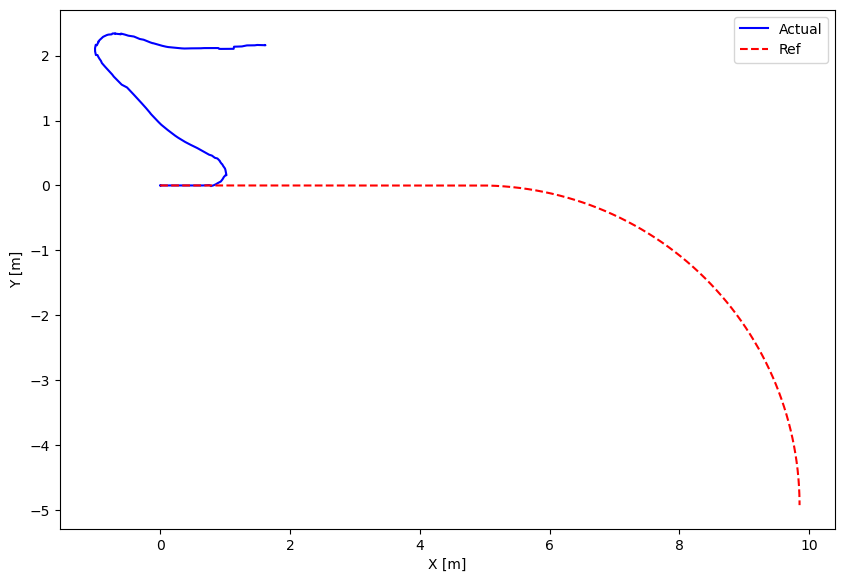

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df["x"], df["y"], label="Actual", color="blue")
ax.plot(path_C[:, 0], path_C[:, 1], label="Ref", linestyle="--", color="red")
ax.set_aspect('equal')
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.legend()
plt.show()

## Plot Velocity

Linear

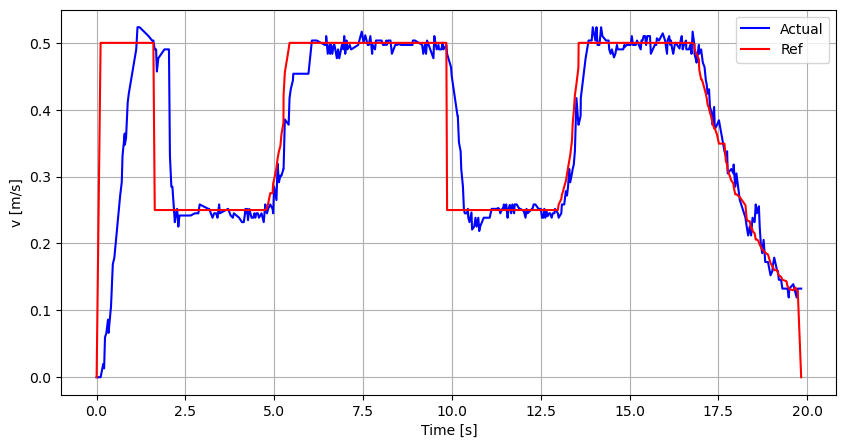

In [33]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["v_real"], label="Actual", color="blue")
ax.plot(t, df["v_cmd"], label="Ref", color="red")
ax.set_xlabel("Time [s]")
ax.set_ylabel("v [m/s]")
ax.grid()
ax.legend()
plt.show()

Angular

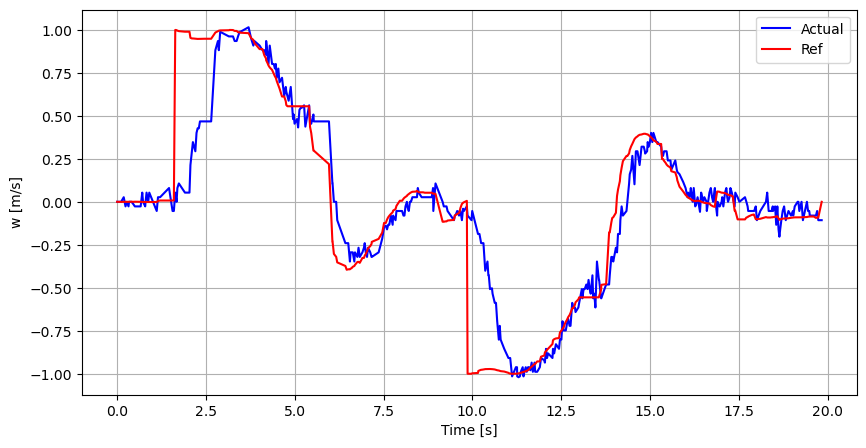

In [34]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["w_real"], label="Actual", color="blue")
ax.plot(t, df["w_cmd"], label="Ref", color="red")
ax.set_xlabel("Time [s]")
ax.set_ylabel("w [m/s]")
ax.grid()
ax.legend()
plt.show()

Near the goal, the robot did not finish its navigation for a while, I will fix this

## Plot current

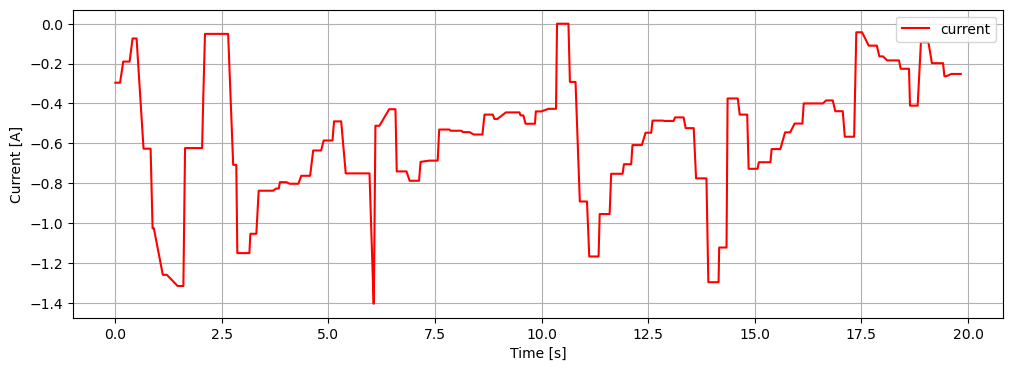

In [35]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["battery_i"], label="current", color="red")
# ax.set_aspect('equal')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")
ax.grid()
ax.legend()
plt.show()

Maybe there is an offset...? about -0.3 [A]

## Calc RMSE

In [36]:
from scipy.spatial.distance import cdist

def calc_rmse(robot_path: np.ndarray, path: np.ndarray) -> float:

    # Compute the distances between each point on the robot trajectory and each point on the path at once (using scipy's cdist)
    # distance_matrix has shape = (number of points in the robot trajectory, number of points in the path)
    distance_matrix = cdist(robot_path, path, metric='euclidean')

    # Take the minimum along the row direction to extract the minimum distance for each robot point
    min_distances = np.min(distance_matrix, axis=1)

    # Compute RMSE
    rmse = np.sqrt(np.mean(min_distances**2))
    
    return rmse


In [37]:
robot_x = df["x"].to_numpy()
robot_y = df["y"].to_numpy()
robot_path = np.c_[robot_x, robot_y]

rmse = calc_rmse(robot_path, path_C)
print(f"RMSE: {rmse:.4f} m")

RMSE: 1.7519 m


## Plot PathB

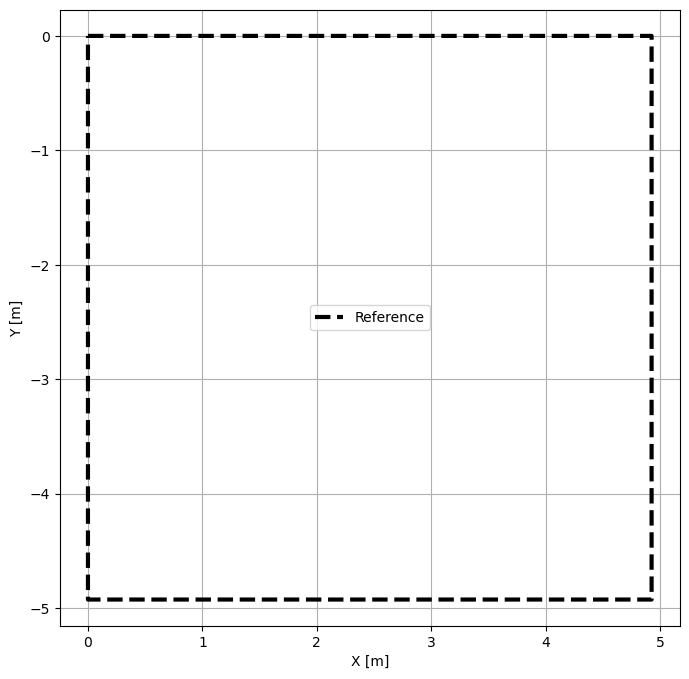

In [38]:
from matplotlib import pyplot as plt
# 経路の描画
plt.figure(figsize=(8, 8))
plt.plot(path_B[:, 0], path_B[:, 1], 'k--', label="Reference", linewidth=3)
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()
